# Lab 5.1 Data Assembly I

## This session will cover:

1. Fetch data from external datasources 
2. Basic merging 


# 1. Let's load and install some libraries

In [1]:
!pip install py-openaq

In [43]:
import pandas as pd
import seaborn as sns

In [3]:
import openaq

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## Let's make our first API call

In [4]:
api = openaq.OpenAQ()

status, resp = api.cities()

In [5]:
status

200

In [6]:
resp

{'meta': {'name': 'openaq-api',
  'license': 'CC BY 4.0',
  'website': 'https://docs.openaq.org/',
  'page': 1,
  'limit': 100,
  'found': 3107,
  'pages': 32},
 'results': [{'country': 'AD',
   'name': 'Escaldes-Engordany',
   'city': 'Escaldes-Engordany',
   'count': 150164,
   'locations': 2},
  {'country': 'AD',
   'name': 'unused',
   'city': 'unused',
   'count': 14831,
   'locations': 1},
  {'country': 'AE',
   'name': 'Abu Dhabi',
   'city': 'Abu Dhabi',
   'count': 158738,
   'locations': 1},
  {'country': 'AE',
   'name': 'Dubai',
   'city': 'Dubai',
   'count': 193771,
   'locations': 1},
  {'country': 'AE',
   'name': 'N/A',
   'city': 'N/A',
   'count': 28455,
   'locations': 2},
  {'country': 'AF',
   'name': 'Kabul',
   'city': 'Kabul',
   'count': 87993,
   'locations': 1},
  {'country': 'AF',
   'name': 'N/A',
   'city': 'N/A',
   'count': 5845,
   'locations': 1},
  {'country': 'AG', 'name': 'N/A', 'city': 'N/A', 'count': 1, 'locations': 1},
  {'country': 'AR',
   'na

## Let's make our second API call
### This time we want the data in pandas format

In [7]:
cities = api.cities(df=True, limit=10000)


/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [8]:
cities

,country,name,city,count,locations
0,AD,Escaldes-Engordany,Escaldes-Engordany,150164,2
1,AD,unused,unused,14831,1
2,AE,Abu Dhabi,Abu Dhabi,158738,1
3,AE,Dubai,Dubai,193771,1
4,AE,N/A,N/A,28455,2
...,...,...,...,...,...
3102,XK,Peje,Peje,53665,1
3103,XK,Prishtine,Prishtine,158819,2
3104,XK,Pristina,Pristina,52884,1
3105,XK,Prizren,Prizren,75323,1


In [9]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    3107 non-null   object
 1   name       3107 non-null   object
 2   city       3107 non-null   object
 3   count      3107 non-null   int64 
 4   locations  3107 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 121.5+ KB


## Let's make our third API call

In [10]:
countries = api.countries(limit=10000, df=True)

print (countries.head())

  code   count  locations  cities                  name
0   AD  164995          3       2               Andorra
1   AE  380964          4       3  United Arab Emirates
2   AF   93838          2       2           Afghanistan
3   AG       1          1       1   Antigua and Barbuda
4   AR   14976          4       1             Argentina


/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [11]:
countries

,code,count,locations,cities,name
0,AD,164995,3,2,Andorra
1,AE,380964,4,3,United Arab Emirates
2,AF,93838,2,2,Afghanistan
3,AG,1,1,1,Antigua and Barbuda
4,AR,14976,4,1,Argentina
...,...,...,...,...,...
101,UZ,89699,2,2,Uzbekistan
102,VM,9935,2,1,NaN
103,VN,116668,5,3,Viet Nam
104,XK,637054,9,8,Kosovo


## Let's make our fourth API call

In [12]:
parameters = api.parameters(df=True)

parameters

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


,id,name,description,preferredUnit
0,bc,BC,Black Carbon,µg/m³
1,co,CO,Carbon Monoxide,ppm
2,no2,NO2,Nitrogen Dioxide,ppm
3,o3,O3,Ozone,ppm
4,pm10,PM10,Particulate matter less than 10 micrometers in...,µg/m³
5,pm25,PM2.5,Particulate matter less than 2.5 micrometers i...,µg/m³
6,so2,SO2,Sulfur Dioxide,ppm


## Let's make our fifth API call

In [13]:
locations = api.locations(df=True)

locations

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


,id,country,city,cities,location,locations,sourceName,sourceNames,sourceType,sourceTypes,firstUpdated,lastUpdated,parameters,countsByMeasurement,count,coordinates.longitude,coordinates.latitude
0,AD-1,AD,Escaldes-Engordany,[Escaldes-Engordany],AD0942A,[AD0942A],EEA Andorra,[EEA Andorra],government,[government],2017-09-13 21:00:00+00:00,2020-09-18 00:00:00+00:00,"[co, no2, o3, pm10, so2]","[{'parameter': 'co', 'count': 25100}, {'parame...",125170,1.53914,42.50969
1,AD-2,AD,Escaldes-Engordany,[Escaldes-Engordany],AD0944A,[AD0944A],EEA Andorra,[EEA Andorra],government,[government],2017-09-13 21:00:00+00:00,2020-09-18 00:00:00+00:00,[o3],"[{'parameter': 'o3', 'count': 24994}]",24994,1.56525,42.51694
2,AD-3,AD,unused,[unused],AD0945A,[AD0945A],EEA Andorra,[EEA Andorra],government,[government],2017-09-14 00:00:00+00:00,2020-09-18 00:00:00+00:00,[o3],"[{'parameter': 'o3', 'count': 14831}]",14831,1.71699,42.53488
3,AE-1,AE,Abu Dhabi,[Abu Dhabi],US Diplomatic Post: Abu Dhabi,[US Diplomatic Post: Abu Dhabi],StateAir_AbuDhabi,[StateAir_AbuDhabi],government,[government],2017-12-26 22:00:00+00:00,2020-09-18 01:00:00+00:00,"[o3, pm25]","[{'parameter': 'o3', 'count': 55694}, {'parame...",158738,54.43375,24.42440
4,AE-2,AE,Dubai,"[Dubai, N/A]",US Diplomatic Post: Dubai,"[US Diplomatic Post: Dubai, Dubai]",StateAir_Dubai,"[StateAir_Dubai, AirNow]",government,[government],2018-07-27 15:00:00+00:00,2020-09-18 01:00:00+00:00,"[o3, pm25]","[{'parameter': 'o3', 'count': 103268}, {'param...",209268,55.30917,25.25848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AT-75,AT,Austria,[Austria],Knittelfeld Parkstraße,[Knittelfeld Parkstraße],EEA Austria,[EEA Austria],government,[government],2016-11-18 05:00:00+00:00,2016-12-12 09:00:00+00:00,"[no2, pm10, so2]","[{'parameter': 'no2', 'count': 262}, {'paramet...",711,14.82445,47.21025
96,AT-127,AT,Austria,[Austria],Köflach,[Köflach],EEA Austria,[EEA Austria],government,[government],2016-11-18 05:00:00+00:00,2016-12-12 09:00:00+00:00,"[no2, pm10, so2]","[{'parameter': 'no2', 'count': 276}, {'paramet...",803,15.07921,47.06170
97,AT-133,AT,Austria,[Austria],Kollmitzberg,[Kollmitzberg],EEA Austria,[EEA Austria],government,[government],2016-11-18 05:00:00+00:00,2016-12-12 09:00:00+00:00,"[o3, so2]","[{'parameter': 'o3', 'count': 270}, {'paramete...",541,14.86667,48.17974
98,AT-92,AT,Austria,[Austria],Kramsach Angerberg,[Kramsach Angerberg],EEA Austria,[EEA Austria],government,[government],2016-11-18 05:00:00+00:00,2016-12-12 09:00:00+00:00,"[no2, o3]","[{'parameter': 'no2', 'count': 280}, {'paramet...",564,11.91058,47.45919


## Let's make our sixth API call

In [56]:
London = api.measurements(city='London', limit=10000, df=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [15]:
London

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2020-09-18 09:00:00,London Eltham,no2,34,b'\xc2\xb5g/m\xc2\xb3',GB,London,2020-09-18 08:00:00+00:00,51.452580,0.070766
2020-09-18 09:00:00,London Harlington,pm25,5,b'\xc2\xb5g/m\xc2\xb3',GB,London,2020-09-18 08:00:00+00:00,51.488790,-0.441614
2020-09-18 09:00:00,Camden Kerbside,pm10,18,b'\xc2\xb5g/m\xc2\xb3',GB,London,2020-09-18 08:00:00+00:00,51.544210,-0.175269
2020-09-18 09:00:00,London Teddington Bushy Park,pm25,5,b'\xc2\xb5g/m\xc2\xb3',GB,London,2020-09-18 08:00:00+00:00,51.425286,-0.345606
2020-09-18 09:00:00,Thurrock,pm10,21,b'\xc2\xb5g/m\xc2\xb3',GB,London,2020-09-18 08:00:00+00:00,51.477070,0.317969
...,...,...,...,...,...,...,...,...,...
2020-09-08 03:00:00,London N. Kensington,so2,3,b'\xc2\xb5g/m\xc2\xb3',GB,London,2020-09-08 02:00:00+00:00,51.521050,-0.213492
2020-09-08 03:00:00,London Eltham,o3,36,b'\xc2\xb5g/m\xc2\xb3',GB,London,2020-09-08 02:00:00+00:00,51.452580,0.070766
2020-09-08 03:00:00,London Marylebone Road,pm10,10,b'\xc2\xb5g/m\xc2\xb3',GB,London,2020-09-08 02:00:00+00:00,51.522530,-0.154611


## Let's fetch some data from some cities
### Berlin,  London, New Delhi, Beijing, Mexico DC

## How do we find Mexico DC ?

In [16]:
cities[cities['country']=='MX']

,country,name,city,count,locations
1775,MX,BAJA CALIFORNIA NORTE,BAJA CALIFORNIA NORTE,76623,3
1776,MX,DISTRITO FEDERAL,DISTRITO FEDERAL,1143993,17
1777,MX,GUANAJUATO,GUANAJUATO,1318125,50
1778,MX,JALISCO,JALISCO,32231,10
1779,MX,MEXICO STATE,MEXICO STATE,1242783,27
1780,MX,NUEVO LEON,NUEVO LEON,21640,7


## Let's gather data from Distrito Federal (Mexico DC)

In [17]:
MexicoDC = api.measurements(city='DISTRITO FEDERAL', limit=10000, df=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [18]:
MexicoDC.head()

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2020-09-18 01:00:00,Pedregal,co,0.500,ppm,MX,DISTRITO FEDERAL,2020-09-18 06:00:00+00:00,19.3251,-99.2041
2020-09-18 01:00:00,UAM Iztapalapa,pm25,2.000,b'\xc2\xb5g/m\xc2\xb3',MX,DISTRITO FEDERAL,2020-09-18 06:00:00+00:00,19.3607,-99.0738
2020-09-18 01:00:00,UAM Iztapalapa,o3,0.017,ppm,MX,DISTRITO FEDERAL,2020-09-18 06:00:00+00:00,19.3607,-99.0738
2020-09-18 01:00:00,Tlahuac,o3,0.017,ppm,MX,DISTRITO FEDERAL,2020-09-18 06:00:00+00:00,19.2464,-99.0100
2020-09-18 01:00:00,UAM Iztapalapa,co,0.300,ppm,MX,DISTRITO FEDERAL,2020-09-18 06:00:00+00:00,19.3607,-99.0738


## Let's gather data from Berlin (the german city not the one in the US)

In [61]:
Berlin = api.measurements(city='Berlin',country='DE', limit=10000, df=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [62]:
Berlin.head()

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2020-09-18 03:00:00,DEBE065,co,150.00,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2020-09-18 01:00:00+00:00,52.514072,13.469931
2020-09-18 03:00:00,DEBE062,o3,30.94,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2020-09-18 01:00:00+00:00,52.653269,13.296081
2020-09-18 03:00:00,DEBE032,pm10,4.96,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2020-09-18 01:00:00+00:00,52.473192,13.225144
2020-09-18 03:00:00,DEBE056,o3,37.39,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2020-09-18 01:00:00+00:00,52.447697,13.647050
2020-09-18 03:00:00,DEBE065,no2,8.26,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2020-09-18 01:00:00+00:00,52.514072,13.469931


## Let's gather data from London

In [21]:
London = api.measurements(city='London', limit=10000, df=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


## Let's gather data from New Delhi

### How do we find New Delhi ??

In [22]:
pd.options.display.max_rows=300
cities[cities['country']=='IN']

,country,name,city,count,locations
1323,IN,203,203,5841,1
1324,IN,Administrative Block,Administrative Block,5874,1
1325,IN,Agra,Agra,252923,2
1326,IN,Ahmedabad,Ahmedabad,192896,1
1327,IN,Aizawl,Aizawl,28788,1
1328,IN,Ajmer,Ajmer,195692,1
1329,IN,Al Afiya General Hospital,Al Afiya General Hospital,10363,1
1330,IN,Alwar,Alwar,479,1
1331,IN,Alwar,Alwar,210921,2
1332,IN,Alwar - Jaipur Rd,Alwar - Jaipur Rd,11115,1


In [23]:


NewDelhi = api.measurements(city='New Delhi', limit=10000, df=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [24]:
NewDelhi.head()

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2019-07-11 16:30:00,"Dwarka-Sector 8, Delhi - DPCC",o3,58.9,b'\xc2\xb5g/m\xc2\xb3',IN,New Delhi,2019-07-11 11:00:00+00:00,28.571027,77.071901
2019-07-11 16:30:00,"Dwarka-Sector 8, Delhi - DPCC",co,1200.0,b'\xc2\xb5g/m\xc2\xb3',IN,New Delhi,2019-07-11 11:00:00+00:00,28.571027,77.071901
2019-07-11 16:30:00,"Dwarka-Sector 8, Delhi - DPCC",so2,16.1,b'\xc2\xb5g/m\xc2\xb3',IN,New Delhi,2019-07-11 11:00:00+00:00,28.571027,77.071901
2019-07-11 16:30:00,"Dwarka-Sector 8, Delhi - DPCC",no2,5.8,b'\xc2\xb5g/m\xc2\xb3',IN,New Delhi,2019-07-11 11:00:00+00:00,28.571027,77.071901
2019-07-11 16:30:00,"Dwarka-Sector 8, Delhi - DPCC",pm25,75.0,b'\xc2\xb5g/m\xc2\xb3',IN,New Delhi,2019-07-11 11:00:00+00:00,28.571027,77.071901


In [25]:
## Let's gather data from Beijing

In [83]:
Beijing = api.measurements(city='Beijing', limit=10000, df=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [84]:
Beijing.head()

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2020-09-18 16:00:00,Beijing US Embassy,pm25,5,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2020-09-18 08:00:00+00:00,39.95,116.47
2020-09-18 15:00:00,Beijing US Embassy,pm25,2,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2020-09-18 07:00:00+00:00,39.95,116.47
2020-09-18 14:00:00,Beijing US Embassy,pm25,1,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2020-09-18 06:00:00+00:00,39.95,116.47
2020-09-18 13:00:00,Beijing US Embassy,pm25,5,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2020-09-18 05:00:00+00:00,39.95,116.47
2020-09-18 12:00:00,Beijing US Embassy,pm25,6,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2020-09-18 04:00:00+00:00,39.95,116.47


# 3. Concatenation

### the following figure provides a visual representation of the operation we want to perform
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_concat_row1.svg">



### Check the documentation for the concat command

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

## We want to combine the measurements of all the cities into a single dataframe

In [63]:
AirQualityCities = pd.concat([Beijing,Berlin,London,MexicoDC,NewDelhi], axis=0)

In [64]:
AirQualityCities

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2020-09-18 16:00:00,Beijing US Embassy,pm25,5.0,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2020-09-18 08:00:00+00:00,39.950000,116.470000
2020-09-18 15:00:00,Beijing US Embassy,pm25,2.0,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2020-09-18 07:00:00+00:00,39.950000,116.470000
2020-09-18 14:00:00,Beijing US Embassy,pm25,1.0,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2020-09-18 06:00:00+00:00,39.950000,116.470000
2020-09-18 13:00:00,Beijing US Embassy,pm25,5.0,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2020-09-18 05:00:00+00:00,39.950000,116.470000
2020-09-18 12:00:00,Beijing US Embassy,pm25,6.0,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2020-09-18 04:00:00+00:00,39.950000,116.470000
...,...,...,...,...,...,...,...,...,...
2019-06-19 04:30:00,"Dwarka-Sector 8, Delhi - DPCC",pm25,107.0,b'\xc2\xb5g/m\xc2\xb3',IN,New Delhi,2019-06-18 23:00:00+00:00,28.571027,77.071901
2019-06-19 04:30:00,"Dwarka-Sector 8, Delhi - DPCC",pm10,232.0,b'\xc2\xb5g/m\xc2\xb3',IN,New Delhi,2019-06-18 23:00:00+00:00,28.571027,77.071901
2019-06-19 04:30:00,"Dwarka-Sector 8, Delhi - DPCC",o3,7.3,b'\xc2\xb5g/m\xc2\xb3',IN,New Delhi,2019-06-18 23:00:00+00:00,28.571027,77.071901


## How are cities doing in terms of CO pollution ??

In [66]:
AirQualityCitiesCO=AirQualityCities[AirQualityCities['parameter']=='co']

In [67]:
AirQualityCitiesCO.sample(10)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2019-07-04 04:00:00,"Dwarka-Sector 8, Delhi - DPCC",co,600.0,b'\xc2\xb5g/m\xc2\xb3',IN,New Delhi,2019-07-03 22:30:00+00:00,28.571027,77.071901
2019-06-22 16:00:00,"Dwarka-Sector 8, Delhi - DPCC",co,600.0,b'\xc2\xb5g/m\xc2\xb3',IN,New Delhi,2019-06-22 10:30:00+00:00,28.571027,77.071901
2019-06-26 19:45:00,"Dwarka-Sector 8, Delhi - DPCC",co,1200.0,b'\xc2\xb5g/m\xc2\xb3',IN,New Delhi,2019-06-26 14:15:00+00:00,28.571027,77.071901
2019-07-08 06:45:00,"Dwarka-Sector 8, Delhi - DPCC",co,1500.0,b'\xc2\xb5g/m\xc2\xb3',IN,New Delhi,2019-07-08 01:15:00+00:00,28.571027,77.071901
2019-06-19 17:15:00,"Dwarka-Sector 8, Delhi - DPCC",co,900.0,b'\xc2\xb5g/m\xc2\xb3',IN,New Delhi,2019-06-19 11:45:00+00:00,28.571027,77.071901
2019-06-24 12:45:00,"Dwarka-Sector 8, Delhi - DPCC",co,900.0,b'\xc2\xb5g/m\xc2\xb3',IN,New Delhi,2019-06-24 07:15:00+00:00,28.571027,77.071901
2020-06-25 02:00:00,DEBE061,co,150.0,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2020-06-25 00:00:00+00:00,52.463611,13.318250
2020-05-20 02:00:00,DEBE061,co,370.0,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2020-05-20 00:00:00+00:00,52.463611,13.318250
2020-04-28 03:00:00,DEBE065,co,300.0,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2020-04-28 01:00:00+00:00,52.514072,13.469931


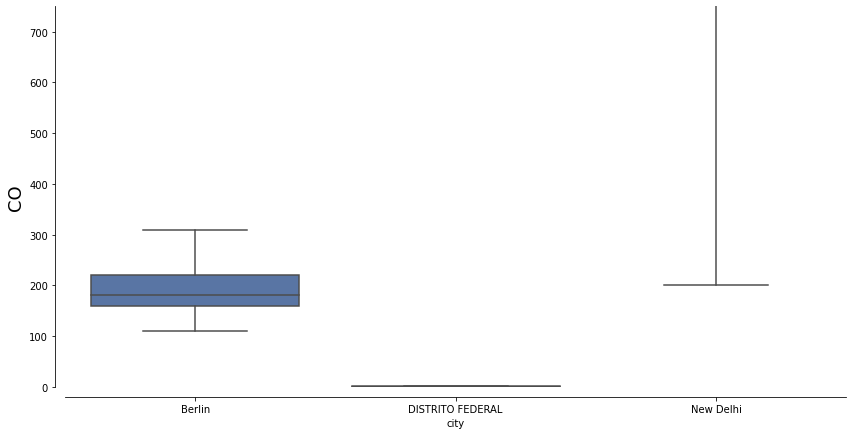

In [68]:
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesCO,
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 750])
ax.set_ylabel("CO", fontsize=18)
ax.set_xlabel("city")

sns.despine(offset=10)


plt.show()

## How are cities doing in terms of PM25 pollution ??

In [69]:
AirQualityCitiesPM25=AirQualityCities[AirQualityCities['parameter']=='pm25']

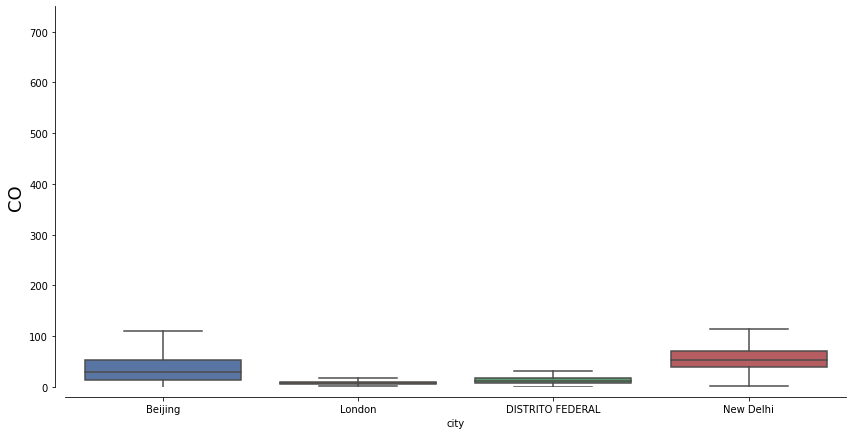

In [70]:
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesPM25,
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 750])
ax.set_ylabel("PM25", fontsize=18)
ax.set_xlabel("city")

sns.despine(offset=10)


plt.show()

## How are cities doing in terms of PM10 pollution ??

In [72]:
AirQualityCitiesPM10=AirQualityCities[AirQualityCities['parameter']=='pm10']

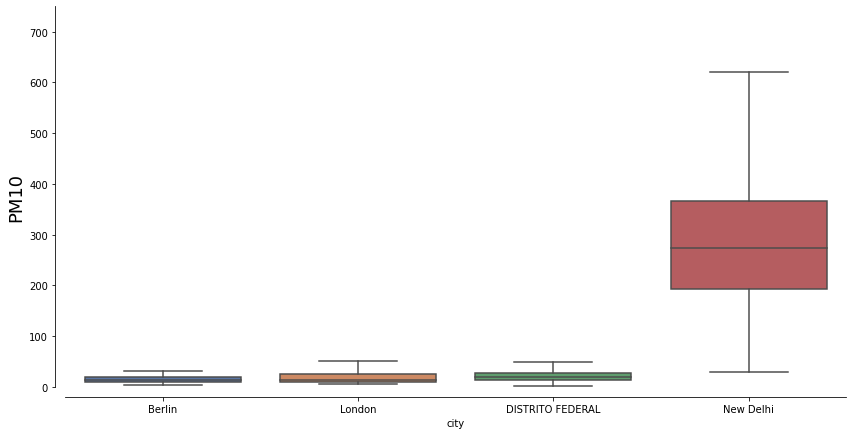

In [73]:
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesPM10,
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 750])
ax.set_ylabel("PM10", fontsize=18)
ax.set_xlabel("city")

sns.despine(offset=10)


plt.show()